In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reference: https://www.kaggle.com/code/huntz232/analisa-harga-properti-di-tebet-jakarta-selatan/input

# Ekstrak Data

In [3]:
data_df = pd.read_csv('./jaksel_rumah.csv')
data_df 

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL
...,...,...,...,...,...,...,...
996,16000000000,488,550,6,5,ADA,JAKSEL
997,4500000000,209,270,4,4,ADA,JAKSEL
998,29000000000,692,400,4,3,TIDAK ADA,JAKSEL
999,1700000000,102,140,4,3,TIDAK ADA,JAKSEL


In [4]:
data_df.shape

(1001, 7)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


In [6]:
data_df.describe()

,HARGA,LT,LB,JKT,JKM
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000
mean,1.747472e+10,530.504496,487.275724,4.457542,3.940060
std,2.079548e+10,531.069773,452.872262,2.004606,1.903261
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000
25%,6.750000e+09,220.000000,300.000000,4.000000,3.000000
50%,1.350000e+10,400.000000,411.000000,4.000000,4.000000
75%,2.000000e+10,677.000000,600.000000,5.000000,4.000000
max,2.500000e+11,6790.000000,10000.000000,27.000000,27.000000


c:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HARGA', ylabel='Density'>

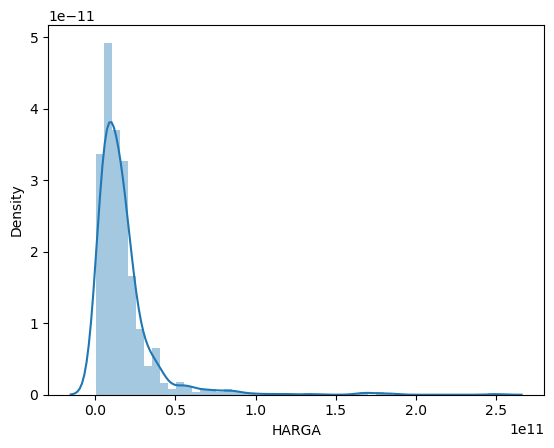

In [7]:
sns.distplot(data_df['HARGA'])

# Feature Enginering

In [9]:
rumah_df = data_df.drop('KOTA', axis=1)

In [10]:
rumah_df = pd.get_dummies(rumah_df, drop_first=True)

In [11]:
rumah_df.shape

(1001, 6)

In [12]:
rumah_df

,HARGA,LT,LB,JKT,JKM,GRS_TIDAK ADA
0,28000000000,1100,700,5,6,0
1,19000000000,824,800,4,4,0
2,4700000000,500,400,4,3,0
3,4900000000,251,300,5,4,0
4,28000000000,1340,575,4,5,0
...,...,...,...,...,...,...
996,16000000000,488,550,6,5,0
997,4500000000,209,270,4,4,0
998,29000000000,692,400,4,3,1
999,1700000000,102,140,4,3,1


In [10]:
num_feat = rumah_df.dtypes[rumah_df.dtypes != 'object'].index

In [11]:
num_feat

Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS_TIDAK ADA'], dtype='object')

<AxesSubplot:>

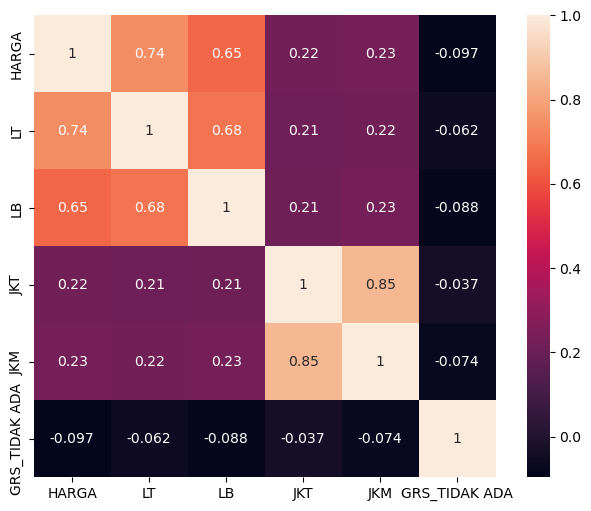

In [12]:
corr_mat = rumah_df[num_feat].corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr_mat, annot=True, square=True)

# Data Cleansing

In [13]:
rumah_df.isna().values.any()

False

In [14]:
rumah_df.duplicated().values.any()#.value_counts()

True

In [15]:
rumah_df.drop_duplicates(inplace=True)
rumah_df.shape

(931, 6)

# Target Enginering

array([[<AxesSubplot:title={'center':'harga'}>,
        <AxesSubplot:title={'center':'log_harga'}>]], dtype=object)

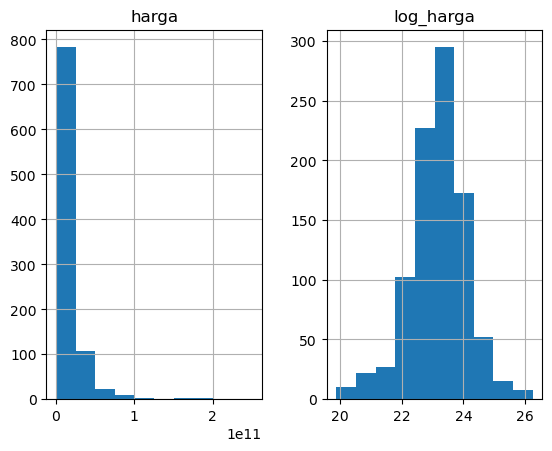

In [19]:
harga = pd.DataFrame({'harga': rumah_df['HARGA'], 'log_harga' : np.log1p(rumah_df['HARGA'])})
harga.hist()

In [21]:
rumah_df['HARGA'] = np.log1p(rumah_df['HARGA'])

In [23]:
#split features n target values
X = rumah_df.drop('HARGA', axis=1)
y = rumah_df['HARGA']

In [24]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

In [25]:
model_lr = LinearRegression()
model_rg = RidgeCV(alphas=[1, 0.1, 0.01, 0.0005])
model_ls = LassoCV(alphas=[1, 0.1, 0.01, 0.0005])

In [26]:
def cross_val_rmse(model):
      return np.sqrt(-cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error'))

In [27]:
cross_val_rmse(model_lr).mean()

0.7053616379882028

In [28]:
cross_val_rmse(model_rg).mean()

0.7053598543052727

In [29]:
cross_val_rmse(model_ls).mean()

0.705370832752854

# Check Important Feature

In [30]:
coef =pd.Series(model_rg.fit(X,y).coef_, index=X.columns)

In [31]:
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

<AxesSubplot:>

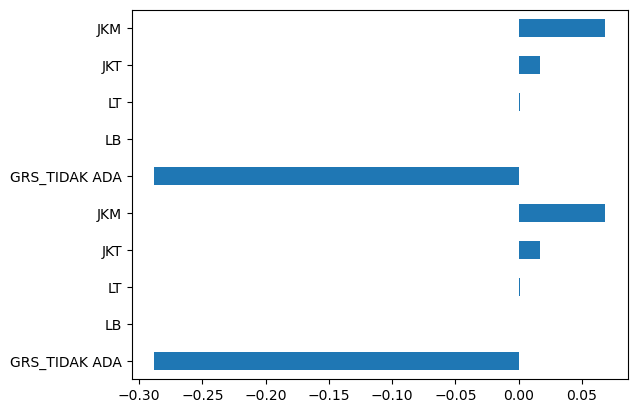

In [32]:
imp_coef.plot(kind='barh')

In [33]:
import pickle
model_rg.fit(X,y)
pickle.dump(model_rg,open('model_rg_rmh_jksl.pkl', 'wb'))